importig necessary libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft

A discrete-time signal synthetizing by using the IDFT in matrix notation

In [7]:
mu = np.array([6, 4, 4, 5, 3, 4, 5, 0, 0, 0, 0])
N = len(mu)  # Długość tablicy mu
k = np.arange(N)
A = 10

In [8]:
x = A * np.exp(1* +1j*2*np.pi/N * k)
mu = fft(x)

In [9]:
mu

array([ 0.00000000e+00+5.77315973e-15j,  1.10000000e+02-1.11410584e-14j,
        4.88498131e-15+2.67354682e-15j, -3.55271368e-15+1.86907312e-15j,
        8.88178420e-16+5.33367030e-15j, -1.77635684e-15-3.85509415e-15j,
       -1.77635684e-15-5.01585676e-15j,  8.88178420e-16-3.28752953e-15j,
        7.10542736e-15-6.70883156e-17j,  2.22044605e-15+2.69751335e-15j,
        7.10542736e-15+5.01966385e-15j])

In [10]:
K = np.outer(k, np.arange(N))
K

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [11]:
W = np.exp(+1j * 2*np.pi/N * K)
W

array([[ 1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ,  1.        +0.j        ,
         1.        +0.j        ],
       [ 1.        +0.j        ,  0.84125353+0.54064082j,
         0.41541501+0.909632j  , -0.14231484+0.98982144j,
        -0.65486073+0.75574957j, -0.95949297+0.28173256j,
        -0.95949297-0.28173256j, -0.65486073-0.75574957j,
        -0.14231484-0.98982144j,  0.41541501-0.909632j  ,
         0.84125353-0.54064082j],
       [ 1.        +0.j        ,  0.41541501+0.909632j  ,
        -0.65486073+0.75574957j, -0.95949297-0.28173256j,
        -0.14231484-0.98982144j,  0.84125353-0.54064082j,
         0.84125353+0.54064082j, -0.14231484+0.98982144j,
        -0.95949297+0.28173256j, -0.65486073-0.75574957j,
         0.41541501-0.909632j  ],
       [ 1.        +0.j     

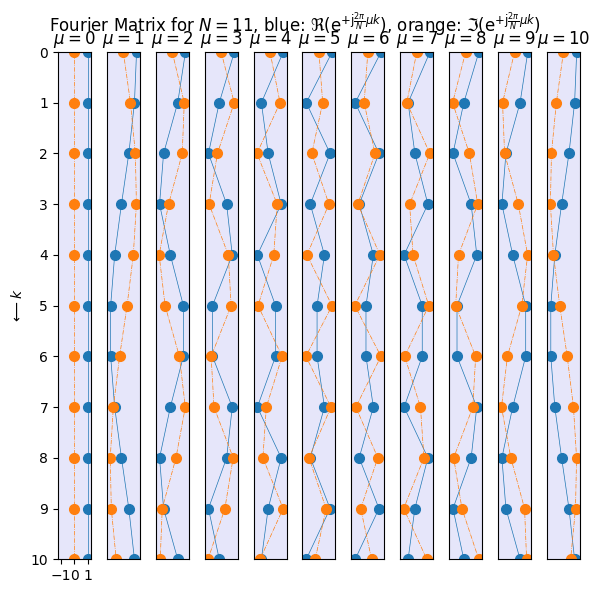

In [12]:
fig, ax = plt.subplots(1, N)
fig.set_size_inches(6, 6)
fig.suptitle(
    r'Fourier Matrix for $N=$%d, blue: $\Re(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$, orange: $\Im(\mathrm{e}^{+\mathrm{j} \frac{2\pi}{N} \mu k})$' % N)

for tmp in range(N):
    ax[tmp].set_facecolor('lavender')
    ax[tmp].plot(W[:, tmp].real, k, 'C0o-', ms=7, lw=0.5)
    ax[tmp].plot(W[:, tmp].imag, k, 'C1o-.', ms=7, lw=0.5)
    ax[tmp].set_ylim(N-1, 0)
    ax[tmp].set_xlim(-5/4, +5/4)
    if tmp == 0:
        ax[tmp].set_yticks(np.arange(0, N))
        ax[tmp].set_xticks(np.arange(-1, 1+1, 1))
        ax[tmp].set_ylabel(r'$\longleftarrow k$')
    else:
        ax[tmp].set_yticks([], minor=False)
        ax[tmp].set_xticks([], minor=False)
    ax[tmp].set_title(r'$\mu=$%d' % tmp)
fig.tight_layout()
fig.subplots_adjust(top=0.91)

fig.savefig('fourier_matrix.png', dpi=300)

In [13]:
X_test = mu
x_test = 1/N * np.matmul(W, X_test)

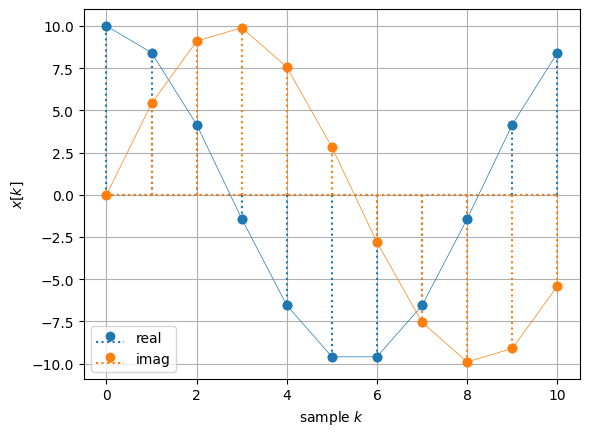

In [14]:
plt.stem(k, np.real(x_test), label='real',
        markerfmt='C0o', basefmt='C0:', linefmt='C0:')
plt.stem(k, np.imag(x_test), label='imag',
        markerfmt='C1o', basefmt='C1:', linefmt='C1:')    
# note that connecting the samples by lines is actually wrong, we
# use it anyway for more visual convenience
plt.plot(k, np.real(x_test), 'C0o-', lw=0.5)
plt.plot(k, np.imag(x_test), 'C1o-', lw=0.5)
plt.xlabel(r'sample $k$')
plt.ylabel(r'$x[k]$')
plt.legend()
plt.grid(True)

In [15]:
print(np.allclose(ifft(X_test), x_test))

True


In [16]:
ifft(X_test)

array([10.        +0.j        ,  8.41253533+5.40640817j,
        4.15415013+9.09631995j, -1.42314838+9.89821442j,
       -6.54860734+7.55749574j, -9.59492974+2.81732557j,
       -9.59492974-2.81732557j, -6.54860734-7.55749574j,
       -1.42314838-9.89821442j,  4.15415013-9.09631995j,
        8.41253533-5.40640817j])

In [17]:
x_test

array([10.        +0.j        ,  8.41253533+5.40640817j,
        4.15415013+9.09631995j, -1.42314838+9.89821442j,
       -6.54860734+7.55749574j, -9.59492974+2.81732557j,
       -9.59492974-2.81732557j, -6.54860734-7.55749574j,
       -1.42314838-9.89821442j,  4.15415013-9.09631995j,
        8.41253533-5.40640817j])

In [18]:
x_test2 = np.sum([X_test[i] * W[:, i] for i in range(N)], axis=0)
x_test2 *= 1/N

In [19]:
print(np.allclose(x_test, x_test2))

True


In [20]:
x_test

array([10.        +0.j        ,  8.41253533+5.40640817j,
        4.15415013+9.09631995j, -1.42314838+9.89821442j,
       -6.54860734+7.55749574j, -9.59492974+2.81732557j,
       -9.59492974-2.81732557j, -6.54860734-7.55749574j,
       -1.42314838-9.89821442j,  4.15415013-9.09631995j,
        8.41253533-5.40640817j])

In [21]:
x_test2

array([10.        +7.17146277e-32j,  8.41253533+5.40640817e+00j,
        4.15415013+9.09631995e+00j, -1.42314838+9.89821442e+00j,
       -6.54860734+7.55749574e+00j, -9.59492974+2.81732557e+00j,
       -9.59492974-2.81732557e+00j, -6.54860734-7.55749574e+00j,
       -1.42314838-9.89821442e+00j,  4.15415013-9.09631995e+00j,
        8.41253533-5.40640817e+00j])